
# Classification
Guillermo Cabrera

guillecabrera@udec.cl



## Supervised Learning

###### Problem Setting:

• Set of possible instances $X$

• Unknown target function $f:X \rightarrow Y$

• Set of function hypotheses $H=\{ h | h : X\rightarrow Y\}$

• <strong>Input</strong>: Training examples $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$ of unknown target function $f$

• <strong>Output</strong>: Hypothesis $h \in H$ that best approximates target
function f
<p/><p/>


Given a training set $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$, we want to determine a learning function $f : X\rightarrow Y$  that predicts the output value of new data as $y = f(\boldsymbol{x})$. $\boldsymbol{x}_i\in X$ are vectors usually called features or attributes, and $y_i\in Y$. When $Y=\{0,1\}$ we call it binary classification, when $Y=\{1,2, \cdots, K\}$ we call it multi-class classification, and when $Y= \mathbb{R}$ we call it regression.

### A Supervised Learning Problem

We want to classify stars/White dwarfs (binary classification) in terms of their colors: SDSS_colors.csv

But, we have a selection of SDSS point sources, along with training sets for three spectroscopically confirmed classes: SDSS\_all\_classes\_21.csv. This is what we call a _training set_. For our first example we eill only consider two colors: u-g and g-r.

Lets plot our training data $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$.

<Figure size 432x288 with 0 Axes>

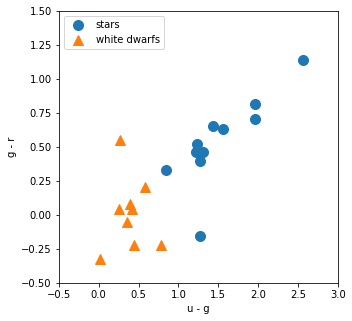

In [1]:
%matplotlib inline

import sys
import numpy as np
import pylab as pl
import pandas as pd

#df = pd.read_csv("data/SDSS_all_classes_21.csv")
df = pd.read_csv("data/stars_wd_20.csv")
colors = df["u_mag"] - df["g_mag"], df["g_mag"] - df["r_mag"]

def Plot2DMags (df):
    pl.plot (colors[0][df['class'] == 1], colors[1][df['class'] == 1], "o", markersize=10, label = "stars", alpha = 1)
    pl.plot (colors[0][df['class'] == 3], colors[1][df['class'] == 3], "^", markersize=10, label = "white dwarfs", alpha = 1)

    pl.xlabel ('u - g')
    pl.ylabel ('g - r')
    pl.legend (loc = "upper left")
    pl.xlim([-0.5, 3])
    pl.ylim([-0.5, 1.5])

pl.clf()
pl.figure(figsize = (5, 5))
Plot2DMags (df)
pl.show()
pl.close()

### Classification Models

Now, we need to determine the _learning function_. For the case of classification a lot of classification models have been proposed. Some of them are:
* Support Vector Machines (SVM)
* Artificial Neural Networks
* Decision Trees
* Gaussian Mixture Models
* Ensambles (multiple models)
* Boosting (set of weak classifiers)

We will briefly describe SVM, decision trees, and random forests, which are ensambles of decision trees.

#### Support Vector Machines

Support Vector Machines (SVM) were originally conceived as a binary classification model using labels $y\in \{-1, 1\}$. Its basic idea is to define a hyper-plane to divide the data into two: $\boldsymbol{w}\cdot\boldsymbol{x} - b = 0$. For the same data-set we can use many hyper-planes in order to separate the data.

<Figure size 432x288 with 0 Axes>

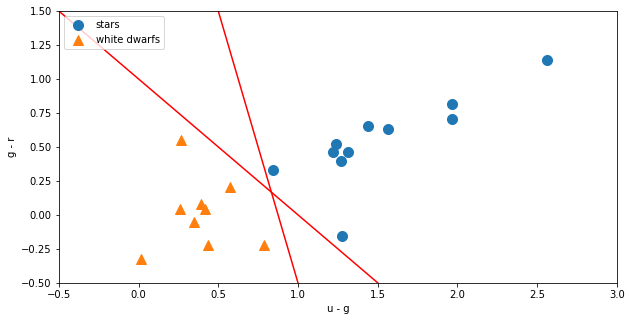

In [2]:
planes = [[[1, 0.5],[-0.5, 1.5]], [[1.5, -0.5],[-0.5, 1.5]]]
pl.clf()
pl.figure(figsize = (10, 5))
Plot2DMags (df)
for plane in planes:
    pl.plot(plane[0], plane[1], "r")


Assuming classes are linearly separable, SVMs find the hyperplane that maximizes the distances to the closest point of each class.

<Figure size 432x288 with 0 Axes>

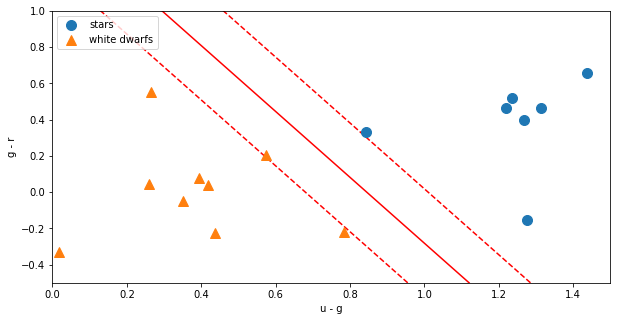

In [3]:
plane = np.array([[1.12, 0.02],[-0.5, 1.5]])
pl.clf()
pl.figure(figsize = (10, 5))
pl.plot(plane[0], plane[1], "r")
pl.plot(plane[0]-0.165, plane[1], "--r")
pl.plot(plane[0]+0.165, plane[1], "--r")
Plot2DMags (df)
pl.xlim([0, 1.5])
pl.ylim([-0.5, 1])
pl.show()

One of the separation planes (dashed lines) is described by $\boldsymbol{w}\cdot\boldsymbol{x} - b = 1$ and the other one by $\boldsymbol{w}\cdot\boldsymbol{x} - b = -1$. The plane that satisfies the above condition is found by 

$\min_{\boldsymbol{w}, b}||\boldsymbol{w}||$ subject to $y_i(\boldsymbol{x}_i - b)\geq 1$.

In case there is no way of way of separating classes with a plane, we can relax this assumption by introducing _slack variables_ $\xi_i$ and minimizing

$\min_{\boldsymbol{w}, b}||\frac{1}{2}\boldsymbol{w} + C\sum\xi_i||$ subject to $y_i(\boldsymbol{x}_i - b)\geq 1 - \xi_i$, $\xi_i\geq0$, $\sum \xi_i \leq C$.

Lets train some SVM on our data using scikit-learn.

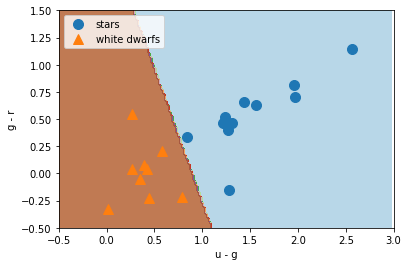

In [4]:
from sklearn.svm import LinearSVC, SVC

model = LinearSVC (C=1)
model.fit (np.array(colors).transpose(), df['class'])

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(-0.5, 3.0, h),
                     np.arange(-0.5, 3.0, h))
y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

pl.clf()
pl.contourf(xx, yy, y_pred, cmap=pl.cm.Paired, alpha=0.8)
Plot2DMags (df)


When instances cannot be linearly separable, we can also do a space transformation by using the so called _kernel trick_.

<img src = images/KernelTrick0.png /><img src = images/KernelTrick1.png />

Some Kernels:
* linear: $K(x, x') = <x, x'>$
* polynomial: $K(x, x') = (\gamma<x, x'> + r)^d$
* radial basis function: $K(x, x') = \exp(-\gamma|x - x'|^2)$
* sigmoid: $\tanh (\gamma<x, x'> + r)$

Separation hypersurface:

$H(x) = \sum_{i=1}^{N_{SV}} a_i y_i K(x, x_i) + b_0$

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


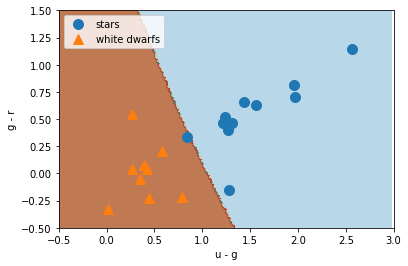

In [5]:
model = SVC (kernel = "rbf", C = 0.2)
model.fit (np.array(colors).transpose(), df['class'])

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(-0.5, 3.0, h),
                     np.arange(-0.5, 3.0, h))
y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

pl.clf()
pl.contourf(xx, yy, y_pred, cmap=pl.cm.Paired, alpha=0.8)
Plot2DMags (df)

Lets use GridSearchCV to find the optimal parameters

In [6]:
from sklearn.model_selection import GridSearchCV

C_range = 10. ** np.arange(-4, 4)
gamma_range = 10. ** np.arange(-4, 4)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(kernel = "rbf"), param_grid=param_grid, cv = 8)

grid.fit (np.array(colors).transpose(), df['class'])

print "The best classifier is: ", grid.best_estimator_

score_dict = grid.cv_results_

# We extract the scores
scores = [x for x in score_dict['mean_test_score']]
print np.array(scores).shape
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.gist_heat)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

y_pred = grid.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

pl.clf()
pl.contourf(xx, yy, y_pred, cmap=pl.cm.Paired, alpha=0.8)
Plot2DMags (df)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("The best classifier is: ", grid.best_estimator_)? (<ipython-input-6-1decc6b672ba>, line 12)

### Decision Trees

Decision trees iteratively divide the coordinate space linearly into different regions.

<img src = "images/DecisionTree.png" />

How do we split the data?

### Impurity Measures

* Entropy: $H(x) = -\sum_xp(x)\log_2p(x)$
* Gini = $1 - \sum_xp(x)^2$
* Classification error: $1 - \max_x p(x)$

<img src = "images/impurity.png" />

Gain: reduction in impurity due to the partitioning of the data.

$gain = I(parent) - \sum_{k=1}^K\frac{N_k}{N}I_k$

Goal: maximize the gain

Information gain: gain associated to entropy.


### Random Forests (Ensemble of Trees)

### An ensemble is a set of weak learners that working toghether create a strong learning model. Random Forests are ensembles of decision trees. They have gained fame because of their excelent performance.

* n trees
* for each tree:
 * select a bootstrap sample (drawing with replacement)
 * train using $m$ randomly chosen attributes for splitting each node
* $f(x) = \frac{1}{N}\sum_{i=1}^n f_i(x)$, where $f_i(x)$ is the label estimated by the $i$th tree.


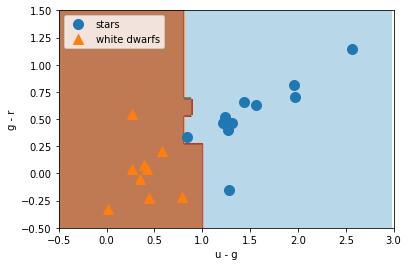

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier (n_estimators = 10)
model.fit (np.array(colors).transpose(), df['class'])

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(-0.5, 3.0, h),
                     np.arange(-0.5, 3.0, h))
y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

pl.clf()
pl.contourf(xx, yy, y_pred, cmap=pl.cm.Paired, alpha=0.8)
Plot2DMags (df)


## Validation

How can we estimate how good a classifier is?

Accuracy = $\frac{\text{Number of correct classifications}}{\text{Total number of objects}}$


Error = $\frac{\text{Number of wrong classifications}}{\text{Total number of objects}}$

**Errors for Binary Classification:**

True Positive Rate (sensitivity or recall) = TP / (TP + FN)
 
True Negative Rate (specificity)= TN /(FP + TN)

False Positive Rate (fall-out) =  FP / (FP + TN)

False Negative Rate = FN / (TP + FN)

Positive Predictive Value (precision) = TP / (TP + FP)

Negative Predictive Value = TN / (TN + FN) 

**Unbalanced Data-sets:**
<img src = images/Unbalanced1.png />
Accuracy = 94%

Error = 6%

Great! Isn’t it?
But we’re missing all triangles!

<img src = images/BalAccuracy.png />

<img src = images/Unbalanced1.png />
Balanced Accuracy = 50%

Balanced Error = 50%

Not that good.

**Confusion Matrix:**

<img src = images/CMatrix.png />

<img src = images/CMatrix2.png />

## Overfitting

Overfitting is the problem of your model adjusting so well to your training data that it fails to predict new data.

<img src=images/Overfitting1.png />

<img src=images/Of2.png />

** Solution:** _Cross validation_ is the process of validating a trained model over un-seen test data.
* Holdout Method:
 * Separate the training set into two disjoint sets.
 * Train over one set and validate over the other set.
 * Usually 2/3 for training, 1/3 for testing.
 * Calculate accuracy and confussion matrix over the test set. 
* Random subsampling:
 * Randomly divide the data into train and test sets.
 * Perform the holdout method for each division.
 * Accuracy is calculated as the average of the accuracies obtained. 
* K-fold:
 * Divide the dataset into k disjoint subsets (k-fold cross-validation).
 * Leave one set for testing and use the other k-1 for training.
 * Repeat k times using each subset once for validation. 
* Bootstrap:
 * Generate m subsets of size n’< n, sampling from D randomly with replacement.
 * Records not included in the training set become part of the test set.
 * On average, a bootstrap training set of size n contains 63.2% of the records in the original data. 

## A more realistic version of the point source problem

Point sources ... what are they?
* A selection of SDSS point sources, along with training sets for three spectroscopically confirmed classes:
 * main-sequence plus red-giant stars
 * quasars
 * white dwarfs 

Let's do a 3D plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("data/SDSS_all_classes_21.csv")

df = df.sample (20000)

u, g, r, i, z = df["u_mag"].values, df["g_mag"].values, df["r_mag"].values, df["i_mag"].values, df["z_mag"].values
colors = np.array([u - g, g - r, r - i, i - z]).transpose()
print colors.shape
names = np.array(["u - g", "g - r", "r - i", "i - z"])
classes = np.array(df['class'])
cl_names = ["star", "quasar", "white dwarf"]

pl.clf()
fig = pl.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c = classes, s = 40)
ax.set_xlim3d(-1.5, 3)
ax.set_ylim3d(-1.5, 3)
ax.set_zlim3d(-1.5, 3)
ax.set_xlabel (names[0])
ax.set_ylabel (names[1])
ax.set_zlabel (names[2])

pl.show()

## Using scikit-learn

scikit-learn.org

In [ ]:
from sklearn import svm

data_svm = colors
print data_svm
clf = svm.LinearSVC()
print "data-set size = ", len(classes)

clf.fit(data_svm, classes)

print clf

pred_class = clf.predict(data_svm)

N_match = (pred_class == classes).sum()
print "N_match = ", N_match
acc = 1. * N_match / len(classes)
print "Accuracy = ", acc

But...are we using it correctly?

We are using the same data-set for training and validating!

## Holdout validation

In [ ]:
from sklearn import svm, cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split (data_svm, classes, test_size=1./3.)

print "training set = ", X_train.shape, y_train.shape
print "test size = ", X_test.shape, y_test.shape

clf.fit(X_train, y_train)

pred_class = clf.predict(X_test)

N_match = (pred_class == y_test).sum()
print "N_match = ", N_match
acc = 1. * N_match / len(pred_class)
print "Accuracy = ", acc

Much better, isn’t it?
But is it possible that we obtained these results by chance?

In [ ]:
ss = cross_validation.StratifiedShuffleSplit(classes, 5, test_size = 1./3.)
scores = cross_validation.cross_val_score(clf, data_svm, classes, cv=ss)
print "Accuracy = ", scores.mean(), "+-", scores.std()

That’s great!! Though it took long.

Can we achieve better results by getting more data? Or maybe we’re using more data than needed.

In [ ]:
N_test = 2000
Ns = 2**np.arange(5, 15)
print "Ns = ", Ns
scores = np.zeros(len(Ns))
stds = np.zeros(len(Ns))
for i in range(len(Ns)):
    N = Ns[i]
    ss = cross_validation.StratifiedShuffleSplit(classes, 5, test_size = N_test, train_size = N)
    scores_i = cross_validation.cross_val_score(clf, data_svm, classes, cv=ss)
    scores[i] = scores_i.mean()
    stds[i] = scores_i.std()

pl.clf()
fig = pl.figure()
ax = fig.add_subplot(1,1,1)
ax.errorbar (Ns, scores, yerr = stds)
ax.set_xscale("log")
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
pl.show()

Hmmm...I think 1000 objects is good enough.

Can I do better? Recall SVMs:

$\min_{\bf{w}, \xi, b}\left\{\frac{1}{2}||\bf{w}||^2 + C\sum_{i=1}^n\xi_i\right\}$
subject to $y_i(\bf{w\cdot x}_i-b)\geq 1-\xi_i$, $\xi_i\geq 0$

What value for C shall we use? The default is 1.

In [ ]:
from sklearn.grid_search import GridSearchCV

N_train = 1000
N_test = 1000

C_range = 10. ** np.arange(-5, 5)
param_grid = dict(C=C_range)
ss = cross_validation.StratifiedShuffleSplit(classes, 5, test_size = N_test, train_size = N_train)

grid = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=ss)

grid.fit (data_svm, classes)
print "The best classifier is: ", grid.best_estimator_

# plot the scores of the grid grid_scores_ contains parameter settings and scores
# grid_scores_ contains parameter settings and scores                                                 
score_dict = grid.grid_scores_
# We extract just the scores
scores = [x[1] for x in score_dict]

pl.clf()
fig = pl.figure()
ax = fig.add_subplot(1,1,1)
ax.plot (C_range, scores)
ax.set_xscale("log")
ax.set_xlabel("C")
ax.set_ylabel("Accuracy")
pl.show ()


### Using an RBF Kernel

$K(\bf{x}, \bf{x}') = e^{-\gamma||\bf{x}-\bf{x}'||^2}$
   
Now we have to choose C and $\gamma$!!!

In [ ]:
C_range = 10. ** np.arange(-4, 4)
gamma_range = 10. ** np.arange(-4, 4)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(svm.SVC(kernel = "rbf"), param_grid=param_grid, cv=ss)

grid.fit (data_svm, classes)

print "The best classifier is: ", grid.best_estimator_
score_dict = grid.grid_scores_

# We extract the scores
scores = [x[1] for x in score_dict]
print np.array(scores).shape
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.gist_heat)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

Now we have a good RBF SVM classifier. Lets use it over the unlabeled data.

In [ ]:
#train on all the data

#clf = svm.SVC (kernel = "rbf", C = 10., gamma = 10.)
clf = grid.best_estimator_
clf.fit (data_svm, classes)

# load unlabeled data
data_ul = np.genfromtxt("data/SDSS_colors.csv", delimiter=',', skip_header = 1)
u, g, r, i, z = data_ul[:, 0], data_ul[:, 1], data_ul[:, 2], data_ul[:, 3], data_ul[:, 4]
colors_ul = u - g, g - r, r - i, i - z
data_ul = np.array(colors_ul).transpose()
print "new data-set size = ", data_ul.shape

# predict
pred_class = clf.predict (data_ul)

out = np.zeros ((len(pred_class), data_ul.shape[1] + 1))
out[:,:data_ul.shape[1]] = data_ul[:][:]
out[:, -1] = pred_class [:]
np.savetxt("classifications.csv", out, delimiter=",")



In [ ]:
for i in range (3):
    pl.clf()
    pl.figure(figsize=(10,10))
    for cl in np.arange(1, 4):
        criteria = (pred_class == cl)
        pl.plot (colors_ul[i][criteria], colors_ul[i+1][criteria], "o", markersize=5, label = cl_names[cl-1])

    pl.xlabel (names[i])
    pl.ylabel (names[i+1])
    pl.legend (loc = "upper left")
    pl.xlim([-1.5, 3])
    pl.ylim([-1.5, 3])
    pl.show()
    
pl.clf()
fig = pl.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.scatter(colors_ul[0], colors_ul[1], colors_ul[2], label = cl_names[cl-1], c = pred_class, s = 40)
ax.legend(loc="best")
ax.set_xlim3d(-1.5, 3)
ax.set_ylim3d(-1.5, 3)
ax.set_zlim3d(-1.5, 3)
ax.set_xlabel (names[0])
ax.set_ylabel (names[1])
ax.set_zlabel (names[2])

pl.show()

## Summary

1. Get training data (and hopefully visualize it).
2. Train classifier but validate with unseen data.
3. Determine classification parameters (and model).
4. Once all that is done: train with the whole dataset.
5. Classify your new objects.